# 1) Homographies

## 1.1) Introduction

In computer vision, images of points on a plane are related to corresponding image points in a second view by a (planar) homography. This is a projective relation since it depends only on the intersections of planes with lines. It is said that the plane induces a homography between the views. The homography map transfers points from one view to the other as if they were images of points on the plane [1].

Homographies have many practical uses, such as rectifying images, texture warping and creating panoramas, just to cite a few. In essence, a homography __*H*__ maps 2D points (in homogeneous coordinates*) according to:

$ 
\begin{bmatrix}
 x^{'} \\
 y^{'} \\
 w^{'}
\end{bmatrix}
=
\begin{bmatrix}
h_{1} & h_{2} & h_{3} \\
h_{4} & h_{5} & h_{6} \\
h_{7} & h_{8} & h_{9} \\
\end{bmatrix}
\begin{bmatrix}
x \\
y \\
w \\
\end{bmatrix}
\qquad \text{or} \qquad x^{'} = H x 
$


Now, we need to solve for __*H*__. Even though these inhomogeneous equations involve the coordinates nonlinearly, the coefficients of __*H*__ appear linearly. For $n$ correspondences we obtain a system of $2 n$ equations in 8 unknowns. If $n = 4$ then an exact solution is obtained. Otherwise, if $n > 4$, the matrix is over determined, and __*H*__ is estimated by a suitable minimisation scheme. One way to solve is imposing $h_{9}$ equal to 1, and rearrage:

$
A h = b
$

where: 

$
A =
\begin{bmatrix}
x_{1} & y_{1} & 1 & 0 & 0 & 0 & -x_{1} x^{'}_{1} & -y_{1} x^{'}_{1} \\
0 & 0 & 0 & x_{1} & y_{1} & 1 & -x_{1} y^{'}_{1} & -y_{1} y^{'}_{1} \\
x_{2} & y_{2} & 1 & 0 & 0 & 0 & -x_{2} x^{'}_{2} & -y_{2} x^{'}_{2} \\
0 & 0 & 0 & x_{2} & y_{2} & 1 & -x_{2} y^{'}_{2} & -y_{2} y^{'}_{2} \\
x_{3} & y_{3} & 1 & 0 & 0 & 0 & -x_{3} x^{'}_{3} & -y_{3} x^{'}_{3} \\
0 & 0 & 0 & x_{3} & y_{3} & 1 & -x_{3} y^{'}_{3} & -y_{3} y^{'}_{3} \\
x_{4} & y_{4} & 1 & 0 & 0 & 0 & -x_{4} x^{'}_{4} & -y_{4} x^{'}_{4} \\
0 & 0 & 0 & x_{4} & y_{4} & 1 & -x_{4} y^{'}_{4} & -y_{4} y^{'}_{4} \\
\end{bmatrix}
$

$
h^{T} = 
\begin{bmatrix}
h_{1} & h_{2} & h_{3} & h_{4} & h_{5} & h_{6} & h_{7} & h_{8} & h_{9}
\end{bmatrix}
$

$
b^{T} =
\begin{bmatrix}
x^{'}_{1} & y^{'}_{1} & x^{'}_{2} & y^{'}_{2} & x^{'}_{3} & y^{'}_{3} & x^{'}_{4} & y^{'}_{4}
\end{bmatrix}
$

The coefficients can be found using the least squares method, which consists of finding the $h$ that minimizes $||A h - b||^{2}$

Properties of the transformation:

- Origin does not necessarily map to origin

- Lines map to lines

- Parallel lines do not necessarily remain parallel

- Ratios are not preserved


After finding the homography matrix, the transformed image can be calculated by applying it to each pixel of the original image. 

If the calculated position is in between pixels, it is necessary to interpolate the color's values to obtain the value for the pixel. 

To do that, two common interpolation algorithms are used: nearest neighbor interpolation and bilinear interpolation.

Nearest neighbor is the most basic and requires the least processing time of all the interpolation algorithms because it only considers one pixel — the closest one to the interpolated point. This has the effect of simply making each pixel bigger.

Bilinear interpolation considers the closest 2x2 neighborhood of known pixel values surrounding the unknown pixel. It then takes a weighted average of these 4 pixels to arrive at its final interpolated value. This produces smoother looking images when comparing to the nearest neighbor interpolation.

---

\*Homogeneous coordinates are a useful representation for points in image planes. Points in homogeneous coordinates are only defined up to scale so that $x = [x , y , w] = [\alpha x , \alpha y ,  \alpha w] = [x/w, y/w, 1]$ all refer to the same 2D point. As a consequence, the homography $H$ is also only defined up to scale and has eight independent degrees of freedom. Often points are normalized with $w = 1$ to have a unique identification of the image coordinates $x$ , $y$. The extra coordinate makes it easy to represent transformations with a single matrix [3].

## 1.2) Calculations

This section presents an example of homograpy using numpy. A image with perspective will be mapped into another one straightening it

### 1.2.1) Loading the necessary libraries

In [1]:
from matplotlib import pyplot as plt
import math
import numpy as np
import cv2

### 1.2.2) Loading the image

In [2]:
img_name = 'IMG_20170615_082455'
img = cv2.imread(img_name + '.jpg', cv2.IMREAD_GRAYSCALE)

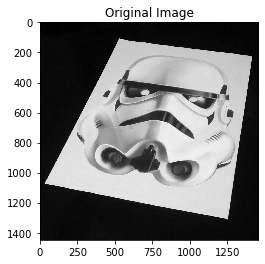

In [3]:
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.show()

In [4]:
height, width = img.shape
print("height: {}, width: {}".format(height, width))

height: 1448, width: 1456


### 1.2.3) Choosing reference points on original image

In order to map on image to another, four reference points are required. These were choosen manually.

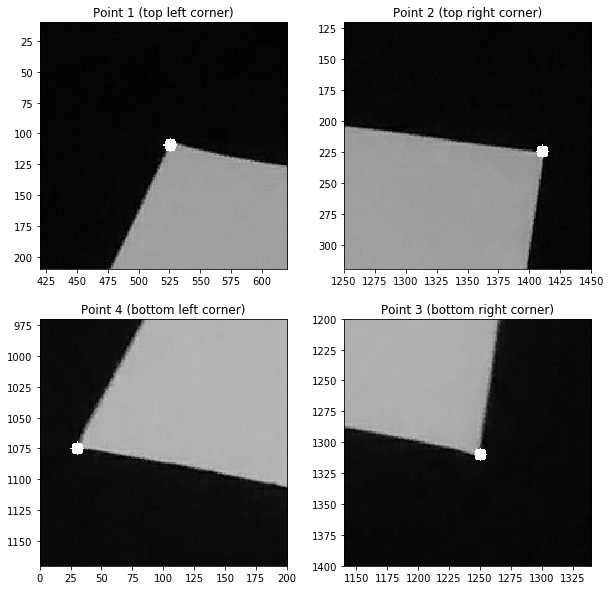

In [5]:
# Manually chosen
drawing_points_image = np.zeros((height, width), np.uint8)
np.copyto(drawing_points_image, img)

from_points = [(525,110), (1410, 225), (1250,1310), (30, 1075)]
cv2.circle(drawing_points_image, from_points[0], 5, 255, -1)
cv2.circle(drawing_points_image, from_points[1], 5, 255, -1)
cv2.circle(drawing_points_image, from_points[2], 5, 255, -1)
cv2.circle(drawing_points_image, from_points[3], 5, 255, -1)

# changing coordinate system of points (opencv -> numpy)
from_points = [(110, 525), (225, 1410), (1310, 1250), (1075, 30)]

fig = plt.figure(figsize=(10,10))

img1 = fig.add_subplot(2,2,1)
img1.axis([420,620,210, 10])
img1.set_title("Point 1 (top left corner)")
img1.imshow(drawing_points_image, cmap='gray')

img2 = fig.add_subplot(2,2,2)
img2.axis([1250,1450, 320, 120])
img2.set_title("Point 2 (top right corner)")
img2.imshow(drawing_points_image, cmap='gray')

img3 = fig.add_subplot(2,2,3)
img3.axis([0,200, 1170, 970])
img3.set_title("Point 4 (bottom left corner)")
img3.imshow(drawing_points_image, cmap='gray')

img4 = fig.add_subplot(2,2,4)
img4.axis([1140,1340, 1400, 1200])
img4.set_title("Point 3 (bottom right corner)")
img4.imshow(drawing_points_image, cmap='gray')

plt.show()

### 1.2.4) Calculating Matrix *A*

To calculate the A matrix, it is necessary to provide the coordinates of the points on the final image that are correspondent of the mapped ones on the original image. It was assumed that the final image will have the same dimensions of the original one. 

By doing that it is known that the final image will also be stretched a little. 

In [6]:
# points on the final image
to_points = [(0,0), (0, width), (width, height), (height, 0)]

A = np.zeros((2*4, 8))

for i in range(4):
    A[2*i] = [from_points[i][0], from_points[i][1], 1, 0, 0, 0, \
             -from_points[i][0]*to_points[i][0], -from_points[i][1]*to_points[i][0] ] 
    A[2*i+1] = [0, 0, 0, from_points[i][0], from_points[i][1], 1, \
               -from_points[i][0]*to_points[i][1], -from_points[i][1]*to_points[i][1] ]
A

array([[ 1.10000e+02,  5.25000e+02,  1.00000e+00,  0.00000e+00,
         0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00],
       [ 0.00000e+00,  0.00000e+00,  0.00000e+00,  1.10000e+02,
         5.25000e+02,  1.00000e+00,  0.00000e+00,  0.00000e+00],
       [ 2.25000e+02,  1.41000e+03,  1.00000e+00,  0.00000e+00,
         0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00],
       [ 0.00000e+00,  0.00000e+00,  0.00000e+00,  2.25000e+02,
         1.41000e+03,  1.00000e+00, -3.27600e+05, -2.05296e+06],
       [ 1.31000e+03,  1.25000e+03,  1.00000e+00,  0.00000e+00,
         0.00000e+00,  0.00000e+00, -1.90736e+06, -1.82000e+06],
       [ 0.00000e+00,  0.00000e+00,  0.00000e+00,  1.31000e+03,
         1.25000e+03,  1.00000e+00, -1.89688e+06, -1.81000e+06],
       [ 1.07500e+03,  3.00000e+01,  1.00000e+00,  0.00000e+00,
         0.00000e+00,  0.00000e+00, -1.55660e+06, -4.34400e+04],
       [ 0.00000e+00,  0.00000e+00,  0.00000e+00,  1.07500e+03,
         3.00000e+01,  1.00000e+0

### 1.2.5) Calculating **_H_** matrix using the least squares method

In [7]:
b = [x for t in to_points for x in t]

H = np.linalg.lstsq(A, b, rcond=None)[0]
H = np.append(H, 1).reshape(3,3)
print("b: " + str(b) + "\n")
print("H: " + str(H))

b: [0, 0, 0, 1456, 1456, 1448, 1448, 0]

H: [[ 2.05992075e+00 -2.67673318e-01 -8.60627908e+01]
 [ 8.66817228e-01  1.68985581e+00 -9.82524194e+02]
 [ 4.31948145e-04 -1.12025639e-06  1.00000000e+00]]


### 1.2.6) Calculating the transformed image using the **_H_** matrix

In order to check the interpolation influence on the final image, both approaches mentioned above were considered (nearest neighbour and bilinear). 

The  **_H_**  matrix maps all pixels from the original image to a transformed position on final image. Since we want to perform the opposite operation, i.e. we are going to loop on all pixels of the final image to access the correspondent one on the original image, it is necessary to calculate the inverse of the **_H_** matrix to perform this operation. 

In [8]:
# Inverse of H
H_inv = np.linalg.inv(H)

# creating the empty images to save results
nearest_neighbor_interpol_image = np.zeros((height, width), np.uint8)
bilinear_interpol_image = np.zeros((height, width), np.uint8)

print("inverse H: \n" + str(H_inv))

inverse H: 
[[ 4.34436705e-01  6.88844684e-02  1.05069492e+02]
 [-3.32168905e-01  5.39483319e-01  5.01468030e+02]
 [-1.88026243e-04 -2.91501587e-05  9.55177201e-01]]


In [9]:
# Auxiliary functions
def dist(p1, p2):
    return math.sqrt((p2[0] - p1[0])**2 + (p2[1] - p1[1])**2)

def interpolate(v1, fv1, v2, fv2, vm):
    return ((v2-vm)/(v2-v1))*fv1 + ((vm-v1)/(v2-v1))*fv2

def calc_bilinear(result, points, values):
    R1 = interpolate(points[0][0], values[0], points[1][0], values[1], result[0])
    R2 = interpolate(points[2][0], values[2], points[3][0], values[3], result[0])
    return interpolate(points[0][1], R1, points[3][1], R2, result[1])

# Calculating the final image
for px in range(0, height - 1):
    for py in range(0, width - 1):
        result = np.dot(H_inv, np.array([px, py, 1]))
        result = result/result[2]
        
        # Getting the four pixels around the one calculated
        x_floor = math.floor(result[0])
        x_ceil = math.ceil(result[0])
        y_floor = math.floor(result[1])
        y_ceil = math.floor(result[1])
        points = [(x_floor, y_floor), (x_floor, y_ceil), (x_ceil, y_ceil), (x_ceil, y_floor)]
        
        # Calculating the distance between the point and the surround pixels
        distances = [dist(result, points[0]), dist(result, points[1]), dist(result, points[2]), dist(result, points[3])]
        
        # Getting the pixel closest to the one calculated
        index_of_min = np.argmin(distances)
        nearest_neighbor_interpol_image[px, py] = img[points[index_of_min][0], points[index_of_min][1]]
        
        # results coordinates is exactly one point in the original image
        if (points[0][0] == points[1][0]) and points[2][0] == points[3][0]:
            bilinear_interpol_image[px, py] = img[int(result[0]), int(result[1])]

        else:
            # Getting the pixel closest to the one calculated
            values = [img[points[0] + (0,)], img[points[1] + (0,)], img[points[1] + (0,)], img[points[1] + (0,)]]
            bilinear_interpol_image[px, py] = calc_bilinear(result, points, values)

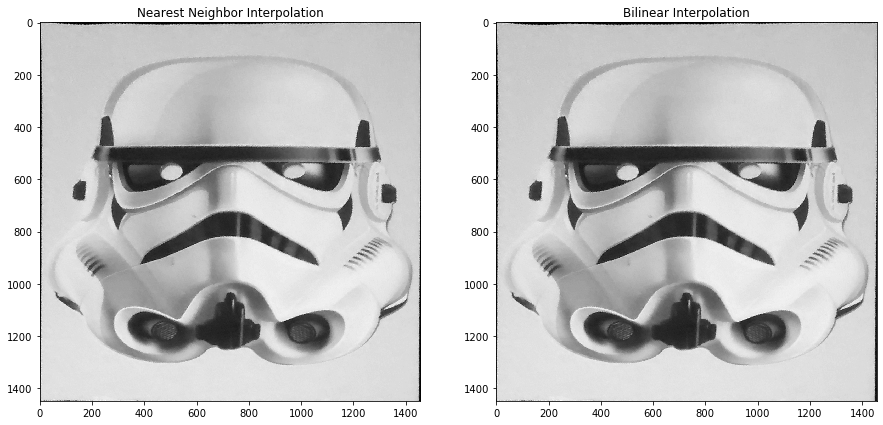

In [10]:
fig = plt.figure(figsize=(15,15))

img1 = fig.add_subplot(1,2,1)
img1.set_title("Nearest Neighbor Interpolation")
img1.imshow(nearest_neighbor_interpol_image, cmap='gray')

img2 = fig.add_subplot(1,2,2)
img2.set_title("Bilinear Interpolation")
img2.imshow(bilinear_interpol_image, cmap='gray')

plt.show()

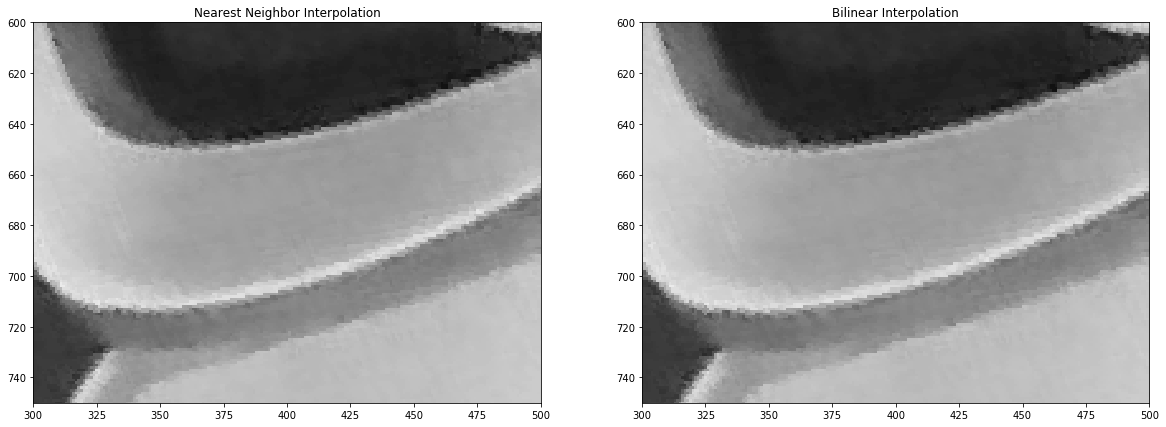

In [11]:
fig = plt.figure(figsize=(20,20))

img1 = fig.add_subplot(1,2,1)
img1.axis([300,500,750, 600])
img1.set_title("Nearest Neighbor Interpolation")
img1.imshow(nearest_neighbor_interpol_image, cmap='gray')

img2 = fig.add_subplot(1,2,2)
img2.axis([300,500,750, 600])
img2.set_title("Bilinear Interpolation")
img2.imshow(bilinear_interpol_image, cmap='gray')

plt.show()

# 2) Conclusions

The homography map transfers points from one view to the other as if they were images of points on the plane. One of the common uses of this transformation is to remove perspective from images. 

In summary, this transformation maps all pixels from one image to a transformed position in another one. If the final calculated position of pixels is between pixels, it is necessary to interpolate the color value using the surround pixels. For this task, two different approaches were used for pixel interpolation: the nearest neighbor and bilinear. 

Results have shown that for this particular image, both interpolation approaches presented similar results but the bilinear presents smoother transitions when the image is zoomed. 

# References

[1] Richard Hartley and Andrew Zisserman. (2003). Multiple View Geometry in Computer Vision (2 ed.). Cambridge University Press, New York, NY, USA.

[2] Serge Belongie & David Kriegman (2007) Explanation of Homography Estimation from Department of Computer Science and Engineering, University of California, San Diego. Acessed 18 May 2019, Retrived from: http://cseweb.ucsd.edu/classes/wi07/cse252a/homography_estimation/homography_estimation.pdf

[3] Solem, Jan Erik. (2012). Programming Computer Vision with Python. Published by O'Reilly Media, Inc., ISBN: 978-1-449-31654-9.

